# Random forest - Example

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/trees/random_forest_classifier_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline

## Data

<img src="../logistic_regression/img/iris_flowers.png" width="800">

In [2]:
iris = load_iris(as_frame=True)
df = iris.frame

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


This data set has information on three types of flowers:

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

And four features:

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

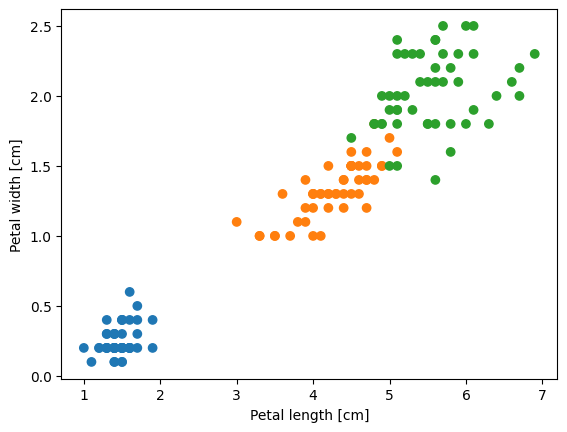

In [7]:
colors = np.array(['tab:blue', 'tab:orange', 'tab:green'])
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color=colors[df.target])
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")
plt.show()

## Random forest training

In [8]:
# Features matrix and target
X = np.c_[df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'], df['petal width (cm)']]
y = df.target

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Tuning hyper-parameter (number of trees) by cross validation

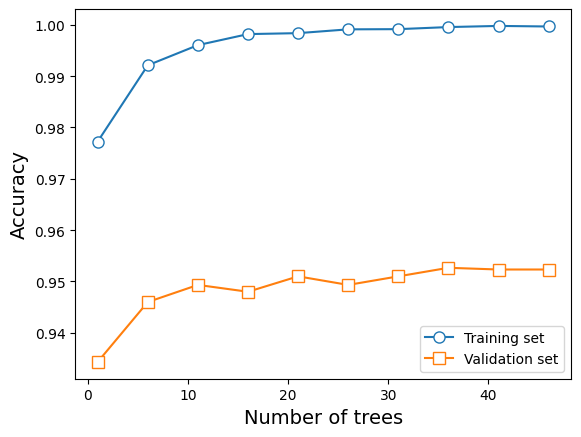

In [9]:
loss_train = []
loss_valid = []

n_max = 50
n_range = range(1, n_max, 5)
for n in n_range:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X, y)
    scores = cross_validate(clf, X, y,
                            cv=RepeatedKFold(n_splits=10, n_repeats=20),
                            scoring='accuracy', return_train_score=True)
    loss_train = np.append(loss_train, scores['train_score'].mean())
    loss_valid = np.append(loss_valid, scores['test_score'].mean())

plt.plot(n_range, loss_train, "o-", markersize=8, markerfacecolor='white', label='Training set')
plt.plot(n_range, loss_valid, "s-", markersize=8, markerfacecolor='white', label='Validation set')
plt.xlabel('Number of trees', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best')
plt.show()

Training a random forest based on selected hyper-parameter:

In [10]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

## Evaluation on test set using the confusion matrix

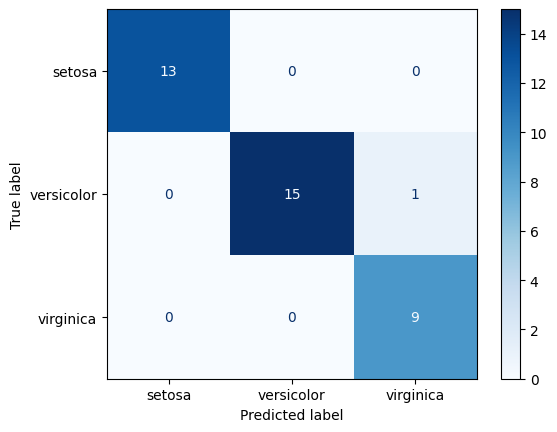

In [11]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=iris.target_names,
    cmap=plt.cm.Blues,
)

## Relative importance of features

Random forests allow to rank the features according to their importance in taking a decision. The importance of a feature is computed as the (normalized) total reduction of the classification metrics across all trees in the forest. It is also known as the Gini importance.

For the iris data set, the petal width has the most significant effect according this way of computing the features importance.

In [12]:
for name, score in zip(iris['feature_names'], clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.17015699640966156
sepal width (cm) 0.017914492145452123
petal length (cm) 0.41444494437360835
petal width (cm) 0.3974835670712781


## Probability to belong to a class

Random forests allow to assign a probability to belong to a class when they do their predictions. The predicted class probabilities of an input sample are computed as the mean predicted class probabilities of the trees in the forest. The class probability of a single tree is the fraction of samples of the same class in a leaf.

This is achieved with the [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) method:

In [13]:
clf.predict_proba([[5.1, 3.5, 1.4, 0.2]])

array([[1., 0., 0.]])

To know in which order the classes are displayed, one can inspect the `classes_` attribute:

In [14]:
clf.classes_

array([0, 1, 2])

In our example, the sample is classified with 100% certainty to the class number 0, which is:

In [15]:
iris['target_names'][0]

'setosa'

## Suggested activities

* Repeat the training by changing the features (e.g. use only two features)
* How many samples are classified wrongly?
* Is the data set balanced?
* Considering the results of the estimation of the features importance, can you explain the figure plotting the Petal length versus the Petal width?